In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [57]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train_ = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_ = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train_ = x_train_.astype('float32')
x_test_ = x_test_.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train_ /= 255
x_test_ /= 255
print('x_train shape:', x_train_.shape)
print('Number of images in x_train', x_train_.shape[0])
print('Number of images in x_test', x_test_.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [59]:
from keras.callbacks import History 
history = History()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=1)

In [60]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 43s 722us/step - loss: 0.2026 - acc: 0.9396
Epoch 2/5
60000/60000 [==============================] - 43s 711us/step - loss: 0.0812 - acc: 0.9744
Epoch 3/5
60000/60000 [==============================] - 46s 773us/step - loss: 0.0595 - acc: 0.9816
Epoch 4/5
60000/60000 [==============================] - 41s 683us/step - loss: 0.0448 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 41s 681us/step - loss: 0.0343 - acc: 0.9889


In [33]:
y_pred = model.predict_classes(x_test)

In [34]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

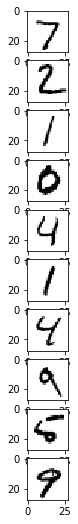

In [78]:
n = 10
f,ax = plt.subplots(n,1,figsize = (27,9))
axes = ax.ravel()
for i in range(n):
    axes[i].imshow(x_test[i].reshape(28,28),cmap = 'Greys')

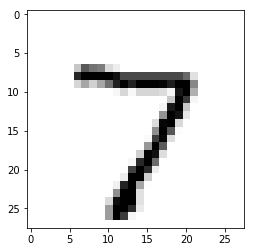

In [79]:
plt.imshow(x_test[0].reshape(28,28),cmap = 'Greys')

In [82]:
model.predict_classes(x_test)[0]

7